In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment_correction.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv


In [2]:
import warnings
# 경고창 숨기기
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
df.head()

date  day  aircraft  helicopter  tank    APC  field artillery   MRL  \
0  2024-08-11  900       366         328  8447  16363            16663  1143   
1  2024-08-10  899       366         327  8441  16350            16605  1143   
2  2024-08-09  898       366         327  8434  16341            16536  1142   
3  2024-08-08  897       366         327  8431  16332            16487  1142   
4  2024-08-07  896       365         326  8429  16323            16451  1138   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0            NaN        NaN  13399          28                    918   
1            NaN        NaN  13372          28                    918   
2            NaN        NaN  13325          28                    916   
3            NaN        NaN  13293          28                    914   
4            NaN        NaN  13212          28                    910   

   special equipment  mobile SRBM system greatest losses direction  \
0             2800.0                 NaN                       NaN   
1             2789.0                 NaN                       NaN   
2             2769.0                 NaN                       NaN   
3             2767.0                 NaN                       NaN   
4             2759.0                 NaN                       NaN   

   vehicles and fuel tanks  cruise missiles  submarines  
0                  22524.0           2425.0         1.0  
1                  22453.0           2425.0         1.0  
2                  22371.0           2424.0         1.0  
3                  22285.0           2424.0         1.0  
4                  22226.0           2421.0         1.0

In [4]:
df = df[['date','drone']]
df.head()

date  drone
0  2024-08-11  13399
1  2024-08-10  13372
2  2024-08-09  13325
3  2024-08-08  13293
4  2024-08-07  13212

In [5]:
df.dtypes

date     object
drone     int64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
drone             int64
dtype: object

In [7]:
df.set_index('date', inplace=True)

In [8]:
df.head()

drone
date             
2024-08-11  13399
2024-08-10  13372
2024-08-09  13325
2024-08-08  13293
2024-08-07  13212

In [9]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 스케일링 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [10]:
# 시퀀스 데이터 생성 (LSTM에 입력할 시계열 데이터)
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

2024-08-15 11:26:09.215720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-15 11:26:09.215843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 11:26:09.369729: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1286 - val_loss: 0.0470
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - val_loss: 0.0083
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - val_loss: 5.3886e-04
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 3.2981e-04
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 8.5129e-04
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - val_loss: 5.9322e-04
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 4.5451e-04
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - val_loss: 3.7068e-04
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - val_loss: 2.9796e-04
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - val_loss: 1.8809e-04
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 4.9908e-06
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


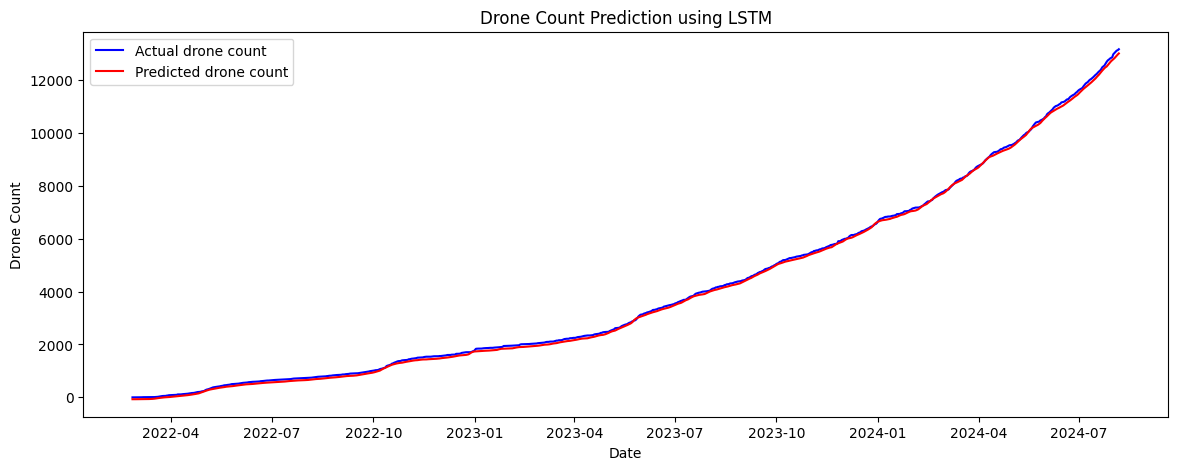

In [12]:
import matplotlib.pyplot as plt

# 예측값 생성
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)

# 실제 값 복원
y_true = scaler.inverse_transform(y.reshape(-1, 1))

# 결과 시각화
plt.figure(figsize=(14,5))
plt.plot(df.index[seq_length:], y_true, color='blue', label='Actual drone count')
plt.plot(df.index[seq_length:], predicted, color='red', label='Predicted drone count')
plt.title('Drone Count Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Drone Count')
plt.legend()
plt.show()